In [45]:
bookings <- read.csv("output.csv")
head(bookings)

X,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,booking_day_of_year
0,1,0,342,7,27,1,0,0,2,...,2,3,0,0,2,0,0,0,1,182
1,1,0,737,7,27,1,0,0,2,...,2,4,0,0,2,0,0,0,1,182
2,1,0,7,7,27,1,0,1,1,...,2,0,0,0,2,75,0,0,1,182
3,1,0,13,7,27,1,0,1,1,...,0,0,0,0,2,75,0,0,1,182
4,1,0,14,7,27,1,0,2,2,...,0,0,0,0,2,98,0,1,1,182
5,1,0,14,7,27,1,0,2,2,...,0,0,0,0,2,98,0,1,1,182


In [46]:
# Discretize lead_time and adr to (low, medium, high)

bookings <- discretizeDF(bookings, methods = list(
  lead_time = list(method = "frequency", breaks = 3, 
    labels = c("Low", "Medium", "High")),
  adr = list(method = "frequency", breaks = 3, 
    labels = c("Low", "Medium", "High"))
  ),
  default = list(method = "none")
  )
head(bookings)


X,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,booking_day_of_year
0,1,0,High,7,27,1,0,0,2,...,2,3,0,0,2,Low,0,0,1,182
1,1,0,High,7,27,1,0,0,2,...,2,4,0,0,2,Low,0,0,1,182
2,1,0,Low,7,27,1,0,1,1,...,2,0,0,0,2,Low,0,0,1,182
3,1,0,Low,7,27,1,0,1,1,...,0,0,0,0,2,Low,0,0,1,182
4,1,0,Low,7,27,1,0,2,2,...,0,0,0,0,2,Medium,0,1,1,182
5,1,0,Low,7,27,1,0,2,2,...,0,0,0,0,2,Medium,0,1,1,182


In [47]:
index <- 1:ncol(bookings)
bookings[ , index] <- lapply(bookings[ , index], as.factor)
str(bookings)

'data.frame':	119390 obs. of  29 variables:
 $ X                             : Factor w/ 119390 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ hotel                         : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ lead_time                     : Factor w/ 3 levels "Low","Medium",..: 3 3 1 1 1 1 1 1 2 2 ...
  ..- attr(*, "discretized:breaks")= num  0 32 124 737
  ..- attr(*, "discretized:method")= chr "frequency"
 $ arrival_date_month            : Factor w/ 12 levels "1","2","3","4",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ arrival_date_week_number      : Factor w/ 53 levels "1","2","3","4",..: 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : Factor w/ 31 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : Factor w/ 17 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_week_nights          : Factor w/ 35 levels "0","1","2",

In [48]:
head(bookings)

X,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,booking_day_of_year
0,1,0,High,7,27,1,0,0,2,...,2,3,0,0,2,Low,0,0,1,182
1,1,0,High,7,27,1,0,0,2,...,2,4,0,0,2,Low,0,0,1,182
2,1,0,Low,7,27,1,0,1,1,...,2,0,0,0,2,Low,0,0,1,182
3,1,0,Low,7,27,1,0,1,1,...,0,0,0,0,2,Low,0,0,1,182
4,1,0,Low,7,27,1,0,2,2,...,0,0,0,0,2,Medium,0,1,1,182
5,1,0,Low,7,27,1,0,2,2,...,0,0,0,0,2,Medium,0,1,1,182


In [49]:
# load up some zoo data
library(arules)

# convert to transactions, where column indicates the output of the attribute
trans <- as(bookings, "transactions")

# # Now that we have transactions, its time to run the apriori algorithm
isets <- apriori(trans, parameter=list(target="frequent", support=0.5))
# sort it and display some of the frequent itemsets from apriori
isets <- sort(isets, by="support") 
inspect(head(isets, n=100))
length(isets)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59695 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[120235 item(s), 119390 transaction(s)] done [1.12s].
sorting and recoding items ... [19 item(s)] done [0.02s].
creating transaction tree ... done [0.08s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.06s].
sorting transactions ... done [0.03s].
writing ... [5243 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].
      items                                support transIdenticalToItemsets  count
[1]   {babies=0}                         0.9923193                        0 118473
[2]   {previous_bookings_not_canceled=0} 

[1] 5243

In [50]:
is_max <- isets[is.maximal(isets)]
inspect(head(sort(is_max, by="support")))
length(is_max)

    items                                support transIdenticalToItemsets count
[1] {children=0,                                                               
     babies=0,                                                                 
     is_repeated_guest=0,                                                      
     previous_cancellations=0,                                                 
     previous_bookings_not_canceled=0,                                         
     booking_changes=0,                                                        
     deposit_type=0,                                                           
     days_in_waiting_list=0,                                                   
     required_car_parking_spaces=0}    0.5797052             8.375911e-06 69211
[2] {children=0,                                                               
     babies=0,                                                                 
     distribution_channel=3,            

[1] 201

In [51]:
# rules <- apriori(trans, parameter=list(support=.5, confidence=.9))
# #%R rules <- apriori( trans, list(minlen=1, supp=0.01, conf=0.01)

# inspect(head(rules, n=100))

# # print out measures of rule quality
# quality(head(rules))



rules <- apriori(bookings, parameter=list(minlen=2, support=.5, confidence=.9), control=list(verbose=F), appearance = list(rhs=c("is_canceled=0", "is_canceled=1"), default="lhs"))
#%R rules <- apriori( trans, list(minlen=1, supp=0.01, conf=0.01)

inspect(head(rules, n=100))

# print out measures of rule quality
quality(head(rules))


      lhs                                   rhs               support confidence  coverage     lift count
[1]   {reservation_status=1}             => {is_canceled=0} 0.6295837          1 0.6295837 1.588351 75166
[2]   {booking_changes=0,                                                                                
       reservation_status=1}             => {is_canceled=0} 0.5019097          1 0.5019097 1.588351 59923
[3]   {deposit_type=0,                                                                                   
       reservation_status=1}             => {is_canceled=0} 0.6277494          1 0.6277494 1.588351 74947
[4]   {children=0,                                                                                       
       reservation_status=1}             => {is_canceled=0} 0.5838177          1 0.5838177 1.588351 69702
[5]   {required_car_parking_spaces=0,                                                                    
       reservation_status=1}             => {i

support,confidence,coverage,lift,count
0.6295837,1,0.6295837,1.588351,75166
0.5019097,1,0.5019097,1.588351,59923
0.6277494,1,0.6277494,1.588351,74947
0.5838177,1,0.5838177,1.588351,69702
0.5674680,1,0.5674680,1.588351,67750
0.6250440,1,0.6250440,1.588351,74624


In [54]:
# sort out the rules and print additional "interest" measures
rules <- sort(rules, by="lift")
inspect(head(rules, n=100))
interestMeasure(rules[1:100], method=c("phi", "gini"), trans=trans)

      lhs                                   rhs               support confidence  coverage     lift count
[1]   {reservation_status=1}             => {is_canceled=0} 0.6295837          1 0.6295837 1.588351 75166
[2]   {booking_changes=0,                                                                                
       reservation_status=1}             => {is_canceled=0} 0.5019097          1 0.5019097 1.588351 59923
[3]   {deposit_type=0,                                                                                   
       reservation_status=1}             => {is_canceled=0} 0.6277494          1 0.6277494 1.588351 74947
[4]   {children=0,                                                                                       
       reservation_status=1}             => {is_canceled=0} 0.5838177          1 0.5838177 1.588351 69702
[5]   {required_car_parking_spaces=0,                                                                    
       reservation_status=1}             => {i

Warning message in interestMeasure(rules[1:100], method = c("phi", "gini"), trans = trans):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecat

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

## Visualize Results

Warning message:
"package 'arulesViz' was built under R version 3.6.3"To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


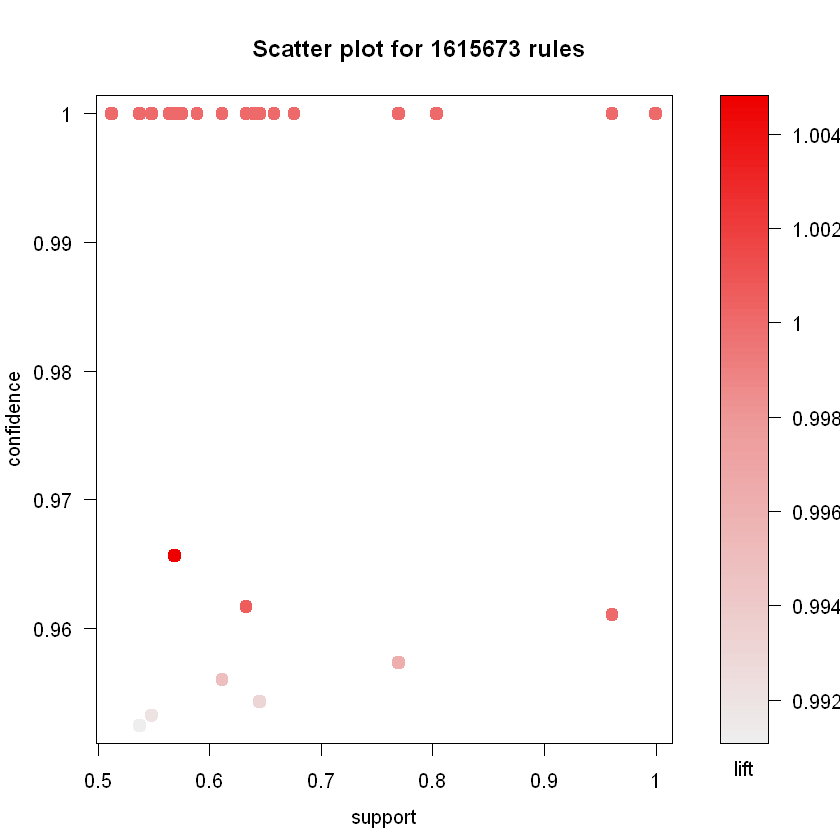

In [7]:

# visualize the different rules, 
#  the first visualization might take some time to render properly
library(arulesViz)
plot(rules)